# Rodando uma simples EMD

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emd

Definimos uma forma de onda simulada contendo uma onda não linear em 5Hz e uma senoide em 1Hz:

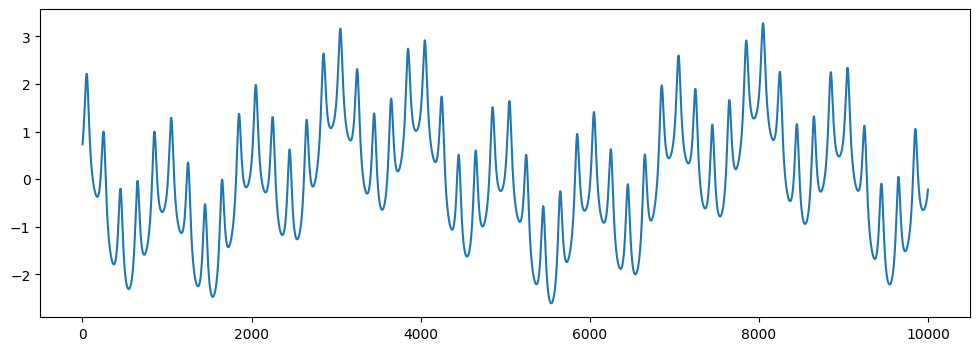

In [21]:
sample_rate = 1000
seconds = 10
num_samples = sample_rate*seconds

time_vect = np.linspace(0, seconds, num_samples)

freq = 5

nonlinearity_deg = 0.60

nonlinearity_phi = -np.pi/2

# Computando o sinal

# Criando uma oscilação não-linear
x = emd.simulate.abreu2010(freq, nonlinearity_deg, nonlinearity_phi, sample_rate, seconds)

x += np.cos(2 * np.pi * 1 * time_vect)        # Add a simple 1Hz sinusoid
x -= np.sin(2 * np.pi * 2.2e-1 * time_vect)   # Add part of a very slow cycle as a trend

# Visualise the time-series for analysis
plt.figure(figsize=(12, 4))
plt.plot(x)

Extraindo as IMFs do sinal

In [22]:
imf = emd.sift.sift(x)
print(imf.shape)

(10000, 4)


A partir das IMFs iremos computar as fases, frequências e amplitudes instântaneas usando o método da Transformada de Hilbert

In [23]:
IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'hilbert')

Agora é possível computar o espectro de Hilbert-Huang

In [24]:
# Definindo o range de frequências (low_freq, high_freq, nsteps, spacing)
freq_range = (0.1, 10, 80, 'log')
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)

## Visualização

<Axes: xlabel='Time (samples)'>

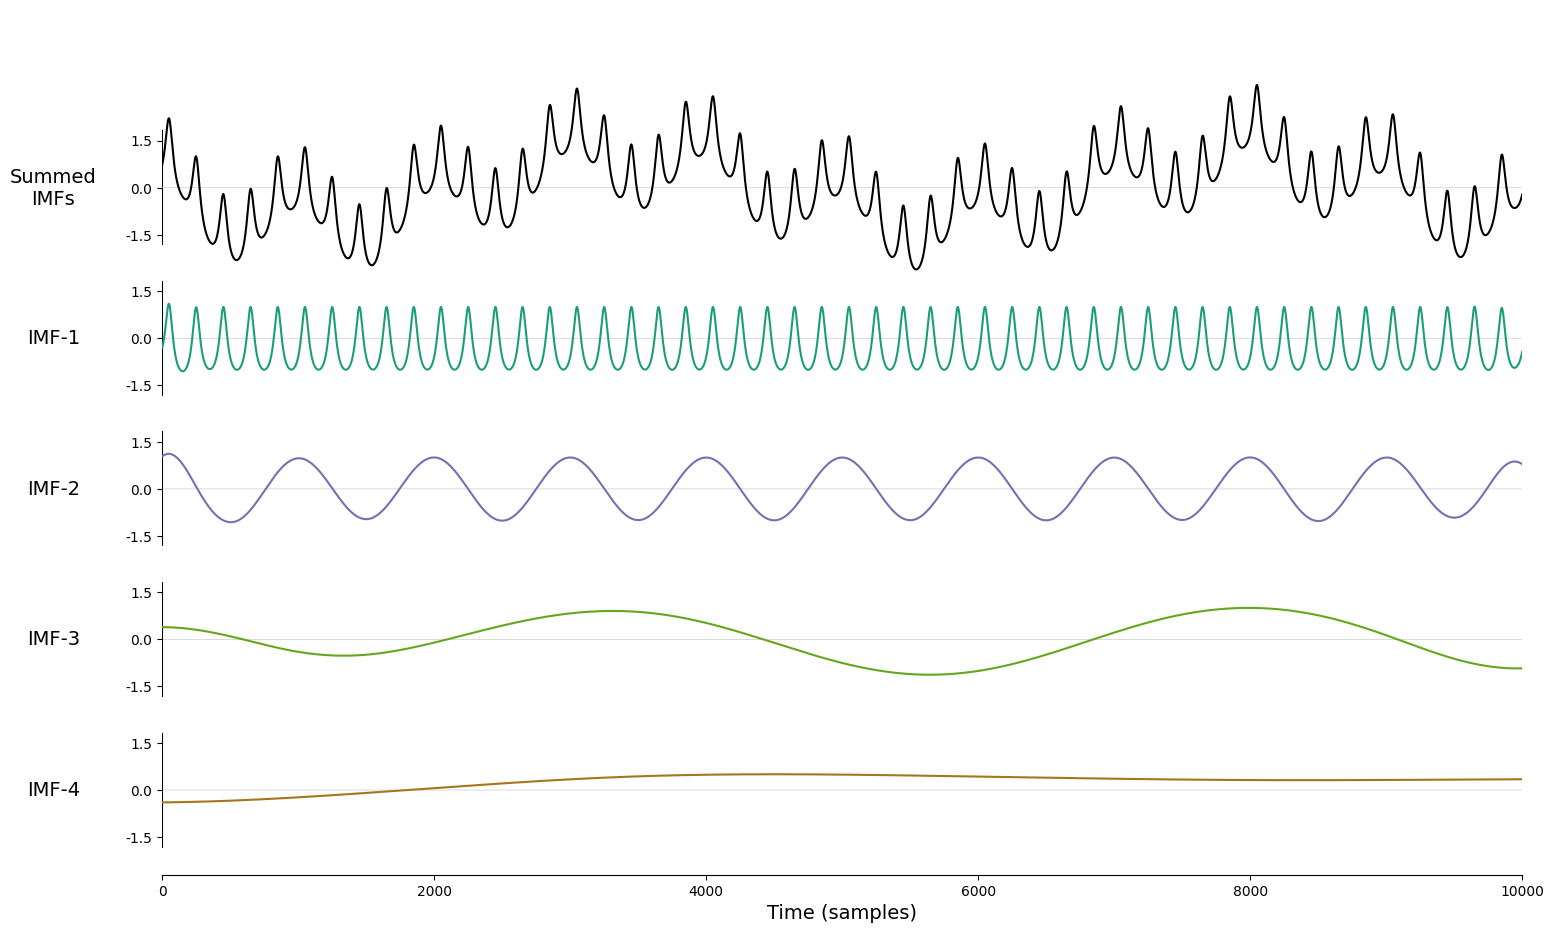

In [25]:
emd.plotting.plot_imfs(imf)

Agora a transformada de Hilbert dessa decomposição

<Axes: title={'center': 'Hilbert-Huang Transform'}, xlabel='Time', ylabel='Frequency'>

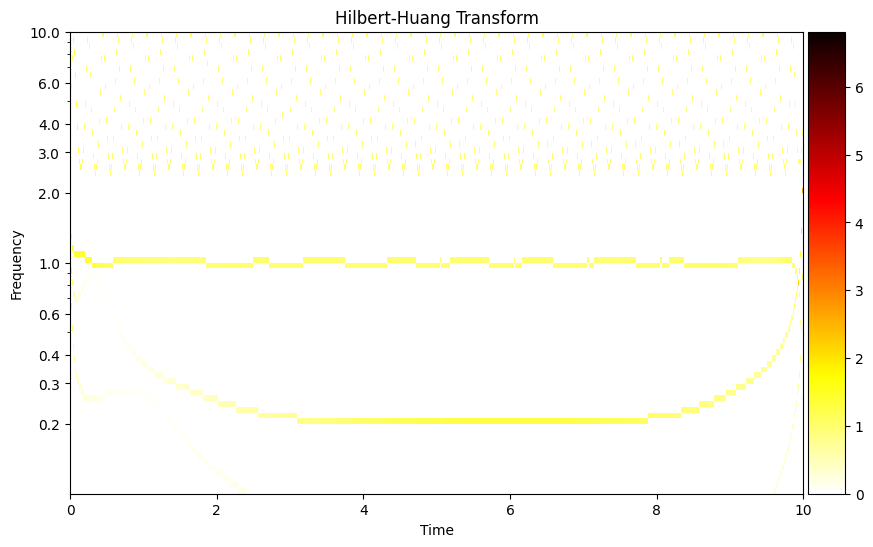

In [26]:
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0, 10), freq_lims=(0.1, 15),
                               fig=fig, log_y=True)

É possível ver a frequência de 1Hz sendo predominante no sinal, assim como a frequência de 0.22

# Aplicando este tutorial em uma série de preços de soja

In [27]:
precos = pd.read_excel(r"C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Series_Precos\Sorriso_jan21-set24.xlsx")
precos.set_index('Data', inplace=True)
precos = pd.DataFrame(precos['Valor'])
precos.head()

,Valor
Data,
2021-01-11,151.193366
2021-01-12,152.695531
2021-01-13,148.774896
2021-01-14,148.430713
2021-01-15,149.769147


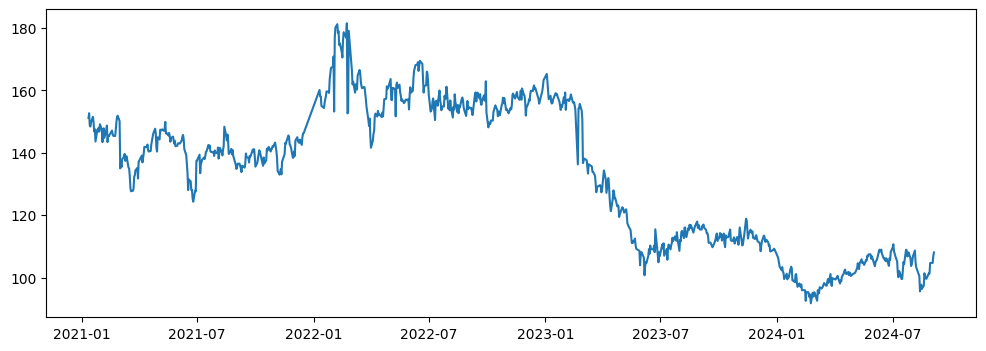

In [28]:
precos.dropna(inplace=True)

plt.figure(figsize=(12, 4))
plt.plot(precos)
plt.show()

Extraindo as IMFs

In [29]:
#A série precisa estar no formato ndarray
valores = precos['Valor'].to_numpy()
type(valores)

numpy.ndarray

In [30]:
imf = emd.sift.sift(valores, max_imfs=5)

In [31]:
IP, IF, IA = emd.spectra.frequency_transform(imf, len(valores), 'nht')

In [32]:
# Definindo o range de frequências (low_freq, high_freq, nsteps, spacing)
freq_range = (0.1, 15, 100, 'log')
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)

<Axes: xlabel='Time (samples)'>

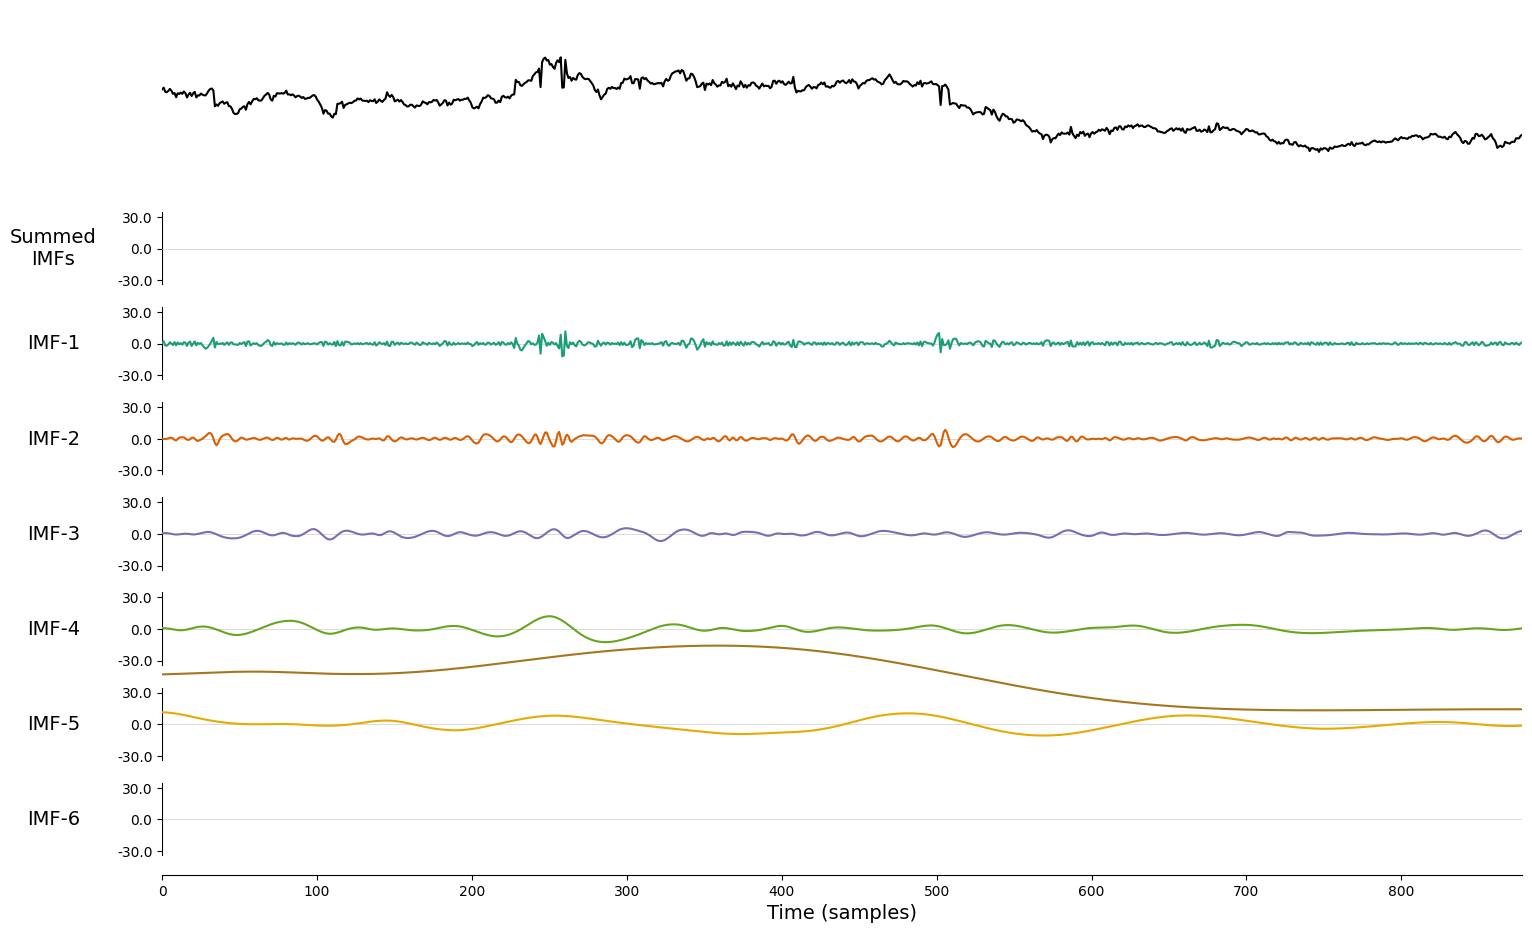

In [33]:
emd.plotting.plot_imfs(imf)

In [34]:
time_vect = np.linspace(0, len(valores))

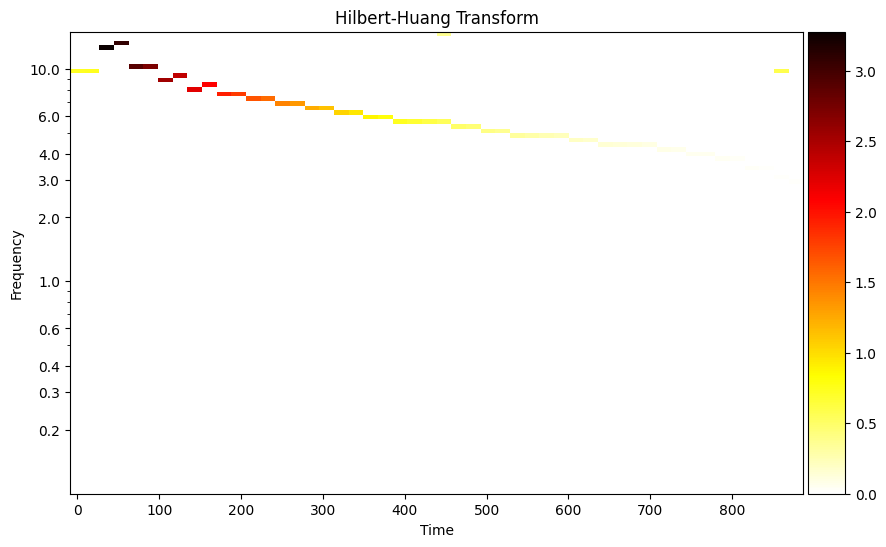

In [35]:
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0,len(valores)), freq_lims=(0.1, 15),
                               fig=fig, log_y=True)
plt.show()

# Testando agora para os retornos

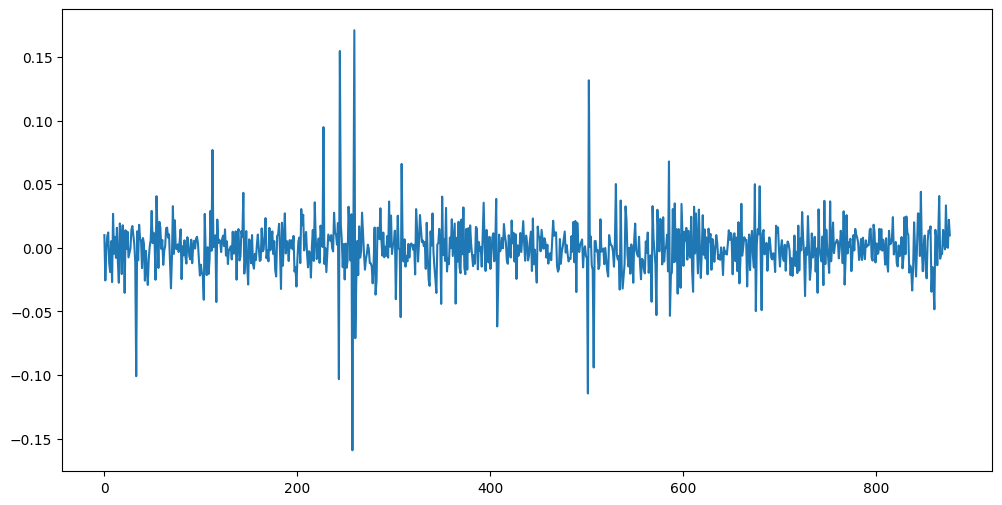

In [36]:
valores = pd.Series(valores)

retornos = valores.pct_change()
retornos.dropna(inplace=True)
retornos = retornos.to_numpy()

plt.figure(figsize=(12,6))
plt.plot(retornos)
plt.show()

<Axes: xlabel='Time (samples)'>

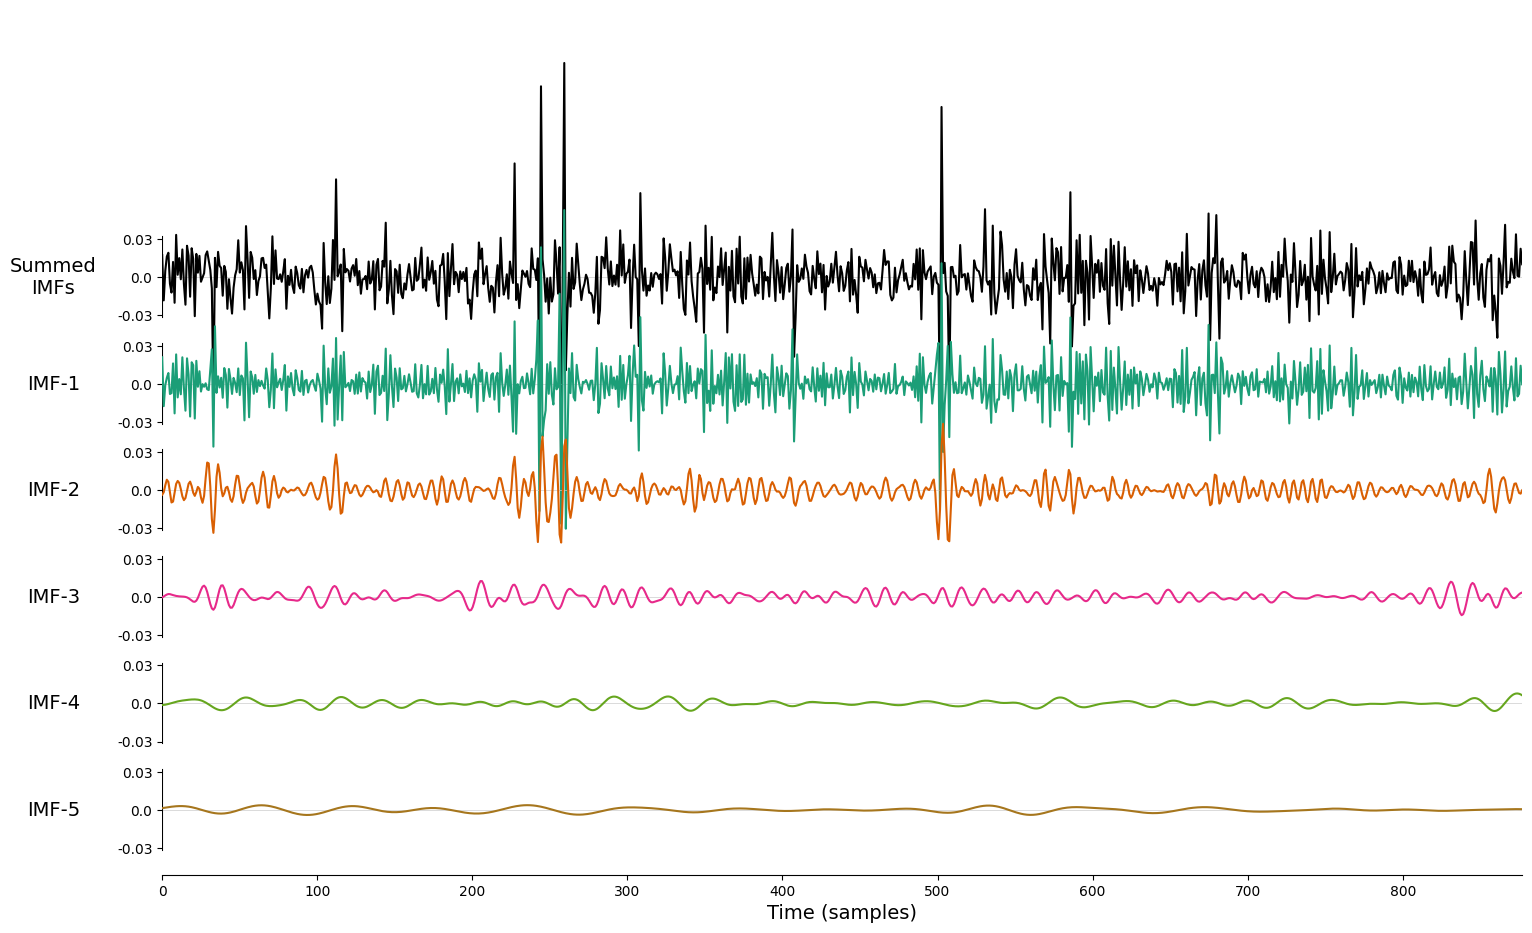

In [37]:
imf_ret = emd.sift.mask_sift(retornos, max_imfs=5)
IP, IF, IA = emd.spectra.frequency_transform(imf_ret, len(retornos), 'nht')
freq_range = (0.1, 15, 100, 'log')
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)
emd.plotting.plot_imfs(imf_ret)

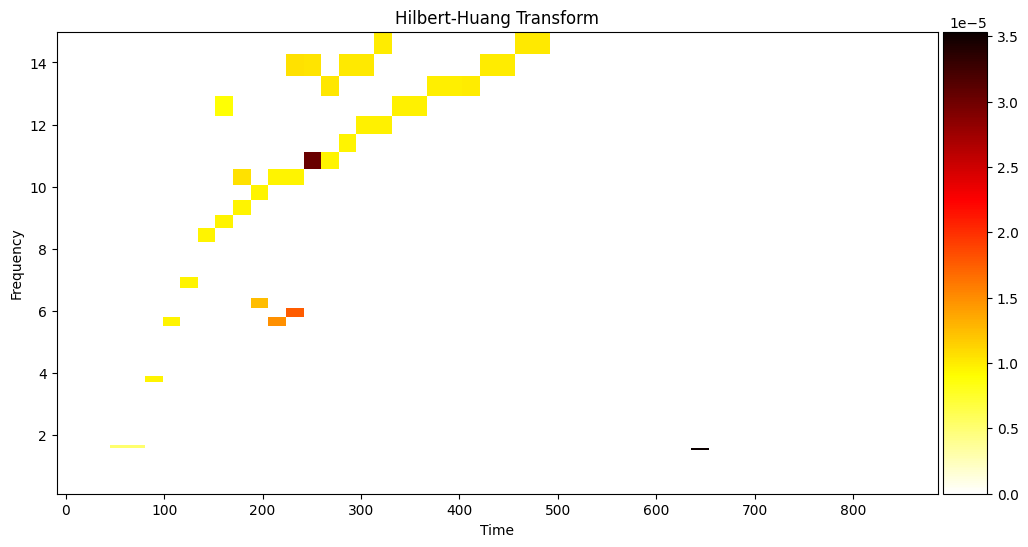

In [38]:
time_vect = np.linspace(0, len(retornos))

fig = plt.figure(figsize=(12, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0,len(retornos)), freq_lims=(0.1, 15),
                               fig=fig, log_y=False)
plt.show()

In [39]:
IA

array([[0.00708263, 0.00832016, 0.00258242, 0.00393269, 0.00314109],
       [0.00707271, 0.00843161, 0.00243588, 0.00386648, 0.00313309],
       [0.00739184, 0.00846992, 0.00233329, 0.00380144, 0.00312574],
       ...,
       [0.01612394, 0.0051774 , 0.00757787, 0.00785904, 0.00068681],
       [0.01430586, 0.00513365, 0.00734653, 0.00783595, 0.00068688],
       [0.01508315, 0.00517607, 0.00707151, 0.00780064, 0.00068654]])